In [3]:
print("yo")

yo


G1 X112.024 Y111.480 E3.130306

instruction
attention voici x [0, 106.664, 106.606, 106.6, 106.639, 106.666, 106.757, 106.971, 107.008, 107.228, 107.274, 107.594, 107.901, 108.23, 108.645, 109.075, 110.799, 111.224, 111.377, 111.686, 112.131, 112.192, 112.49, 112.541, 112.84, 113.049, 113.21, 113.336, 113.394, 113.4, 113.361, 113.334, 113.183, 112.977, 112.757, 112.391, 112.023, 111.682, 111.264, 110.8, 109.3, 109.2, 108.431, 108.046, 107.748, 107.491, 107.282, 107.152, 107.048, 107.003, 107.0, 107.037, 107.059, 107.14, 107.33, 107.55, 107.819, 108.126, 108.401, 108.757, 109.124, 110.8, 111.186, 111.304, 111.569, 111.954, 112.252, 112.509, 112.718, 112.848, 112.952, 112.997, 113.0, 112.963, 112.941, 112.805, 112.627, 112.44, 112.169, 111.861, 111.52, 111.164, 110.8, 109.2, 108.814, 108.696, 108.497, 108.431, 107.818, 107.644, 107.514, 107.433, 107.401, 107.4, 107.435, 107.451, 107.522, 107.655, 107.831, 108.049, 108.297, 108.572, 108.864, 109.166, 110.8, 111.146, 111.223, 111.449, 111.

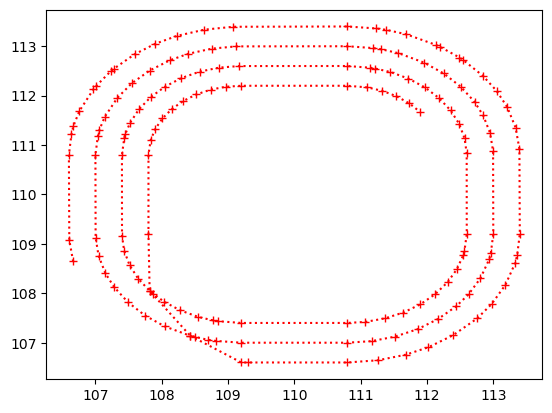

In [47]:
from gcodeparser import GcodeParser
import matplotlib.pyplot as plt

def is_float(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
    
data= []
x= [0]
y= [0]
z= [0]
f= [0]
coeff_dir=[0]

# open gcode file and store contents as variable
with open('C:/Users/aurel/Downloads/fichier cube gcode/aa/a/cube.gcode', 'r') as fichier:
    gcode = fichier.readlines() #gcode est un tableau où chaque élément est une ligne du fichier

print(gcode[400]) #exemple on affiche la ligne 401 soit l'élément 400


for i in range(250,400): # on récupère des instructions
    if gcode[i].startswith(";"):
        continue
    data.append(gcode[i]) #que l'on ajoute dans data
    
print("instruction")    
#print(data)

#on initialise les tableaux ( car si l'instruction ne donne pas de valeur pour z au début on prendra 0)


for i in range(0,len(data)):
    
    if data[i].startswith("G1") or data[i].startswith("G0"): # si ça commence par G1 ou G0
        words = data[i].split() # on sépare data[i] en plusieurs mots (data[0]=G1 X112.024 Y111.480 E3.130306 alors words[0]=G1 ect espace permet la séparation)
        
        x_value=0 #on initialise les valeurs à 0 permettant de savoir si elles ont pris une valeur ou pas
        y_value=0
        z_value=0
        f_value=0
        
        for word in words:
            if(is_float(word[1:])):
                if word.startswith("X"):
                    x_value = float(word[1:]) #permet à x_value de prendre la valeur du tableau word de l'élement 1 à sa fin ( correspond à la valeur de X)
                elif word.startswith("Y"):
                    y_value = float(word[1:])
                elif word.startswith("Z"):
                    z_value = float(word[1:])
                elif word.startswith("F"):
                    f_value = float(word[1:])
                
        if(x_value==0): # s'il n'a pas eu de X dans la commande
            x.append(x[i]) # on ajoute dans le tableau son ancienne valeur 
        else:
            x.append(x_value) # sinon on ajoute sa nouvelle valeur 
            
        if(y_value==0): # s'il n'a pas eu de Y dans la commande
            y.append(y[i]) # on ajoute dans le tableau son ancienne valeur
        else:
            y.append(y_value) # sinon on ajoute sa nouvelle valeur
            
        if(z_value==0): # s'il n'a pas eu de Z dans la commande
            z.append(z[i]) # on ajoute dans le tableau son ancienne valeur
        else:
            z.append(z_value) # sinon on ajoute sa nouvelle valeur

        if(f_value==0): # s'il n'a pas eu de F dans la commande
            f.append(f[i]) # on ajoute dans le tableau son ancienne valeur
        else:
            f.append(f_value) # sinon on ajoute sa nouvelle valeur
    else:
        x.append(x[i])
        y.append(y[i])
        z.append(z[i])
        f.append(f[i])
        
        
print("attention voici x",x)
#print("attention voici y",y)
#print("attention voici z",z)      

print("voici la taille de x", len(x))
print("voici la taille de y", len(y))
print("voici la taille de z", len(z))
            
            
            

# for i in range(1,len(x)): #permet de calculer le coefficient directeur
#     if x[i]!=x[i-1]:
#         coeff_dir_value=(y[i] - y[i-1]) / (x[i] - x[i-1])
        
#         if coeff_dir[i-1]=
        
        
        
print(coeff_dir)        
x.pop(0)
y.pop(0)
plt.plot(x, y,'r+:')
